In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Underfiting e Overfiting

Underfitting é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.

Overfitting é o oposto. O termo vem da tradução de sobre-ajustado. É quando o modelo aprende demais sobre os dados. Neste caso, o modelo mostra-se adequado apenas para os dados de treino, como se o modelo tivesse apenas decorado os dados de treino e não fosse capaz de generalizar para outros dados nunca vistos antes. Quando isso acontece, os dados de treino apresentam resultados excelentes, enquanto que a performance do modelo cai drasticamente com os dados de teste.

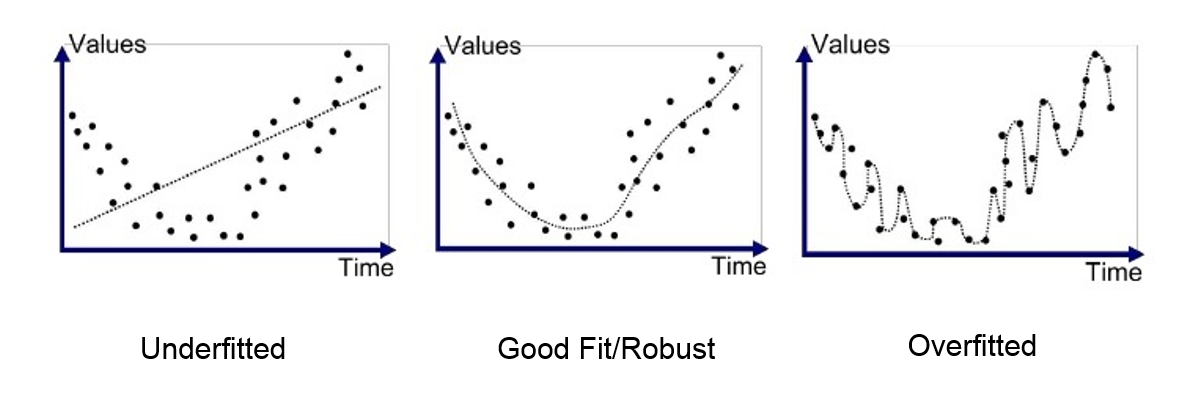

## (Extra) Dados de Treino, Validação, Teste e Inferência

Quando estamos construindo um modelo estatístico ou de machine learning precisamos estimar quão bom ele é, baseado em alguma métrica. Adicionalmente, este teste de “qualidade” deve ser executado em dados que não foram usados na construção do modelo, assim poderemos inferir o comportamento do modelo em dados novos (que nunca foram vistos).


Isso faz todo sentido quanto entendemos o processo como um todo. Veja na figura abaixo os diferentes tipos de dados existentes no processo de modelagem.

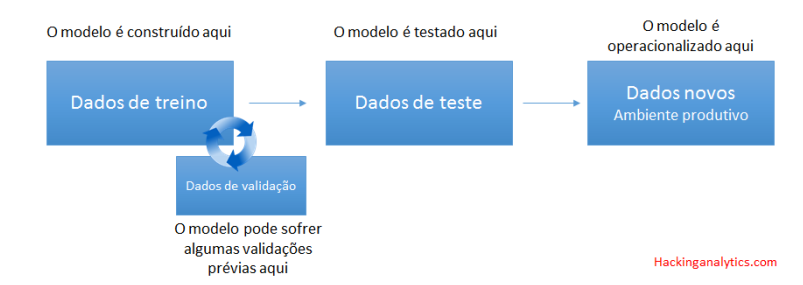

Se um modelo for testado com os dados de treino (os mesmos dados em que foi construído) não podemos generalizar seu resultado para o ambiente de produção, já que não sabemos qual será seu comportamento em dados nunca vistos. É por isso que existe o papel dos dados de teste.

Durante o processo de treino do modelo, ainda é possível dividir os dados de treino em diferentes subconjuntos de dados. Chamamos estes subconjuntos de dados de validação e os utilizamos para fazer validações iniciais durante a aprendizagem do modelo.

É importante garantir que os conjuntos de dados de treino, validação e teste contenham a mesma distribuição dos dados, ou seja, de nada adianta treinar/validar o modelo em um conjunto de dados que não representa o cenário real do problema em estudo.

Chamamos de resampling toda essa organização dos conjuntos de dados. As principais formas resampling são:

* Hold-out validation: Esta é a forma mais simples de separar os dados. Define-se um percentual para cada conjunto de dados (treino, validação e teste) e cria-se as amostras. Geralmente este método é usado quando temos mais dados e conseguimos comprovar que a amostra as amostras criados têm significância estatística para representar a população.

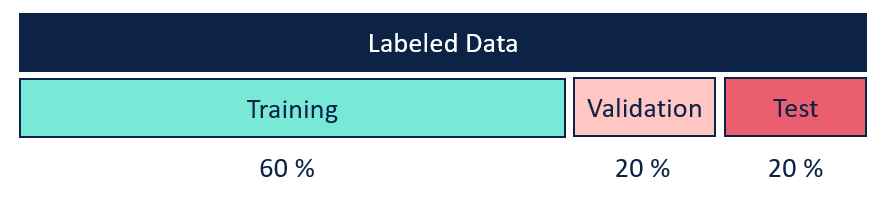

* K-Fold Cross validation: Existem vários tipos de cross validation, porém a mais comum é conhecida como k-fold cross validation. Neste método criamos um número k de amostras, sendo que cada amostra é deixada de lado enquanto o modelo treina com o restante delas. O processo de repete até que seja possível determinar a “qualidade” (depende da métrica em uso) de cada observação (chegando também em uma média geral). Os valores comuns para o número k de amostras são entre 5 e 10.

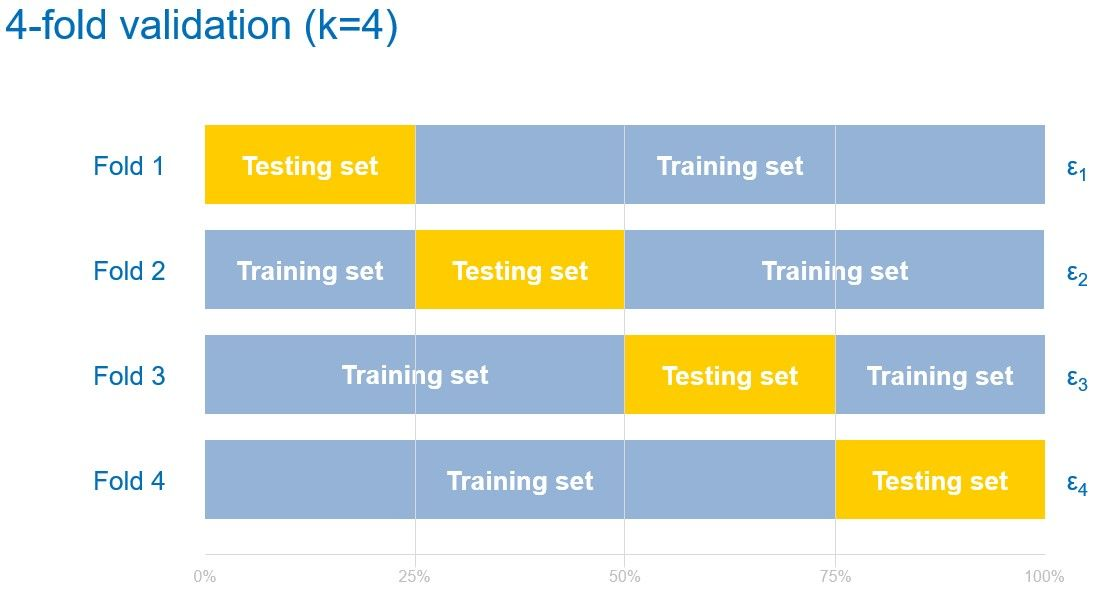

* Stratified K-Fold Cross Validation: Semelhante ao K-Fold Cross Validation porém neste caso o método garante que para todos os grupos de amostras uma variável (normalmente o target) tenha as mesmas proporções.

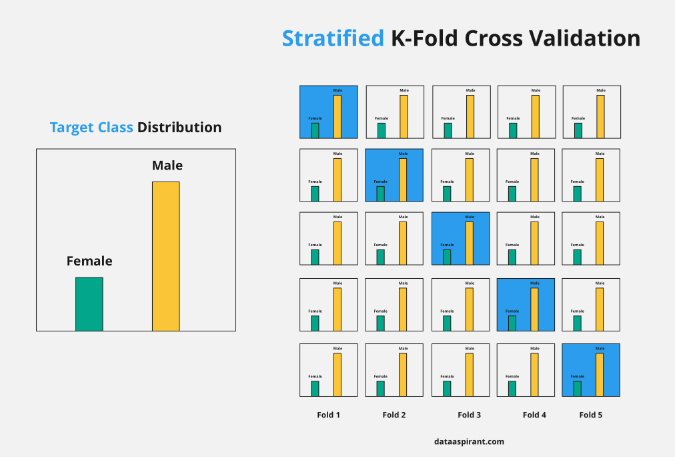

* Leave One Out Cross Validation (LOOCV). Neste método uma observação é deixada de lado e um modelo treina com o restante delas. O processo se repete para todas as observações.

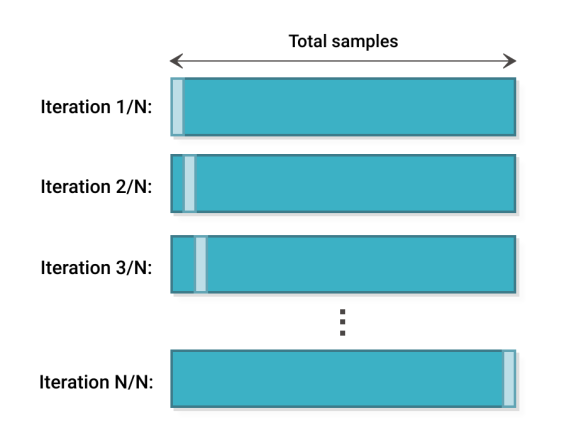

# Viés e Variância

Dados de exemplo:

* Dados verdes: Treino
* Dados azuis: Teste


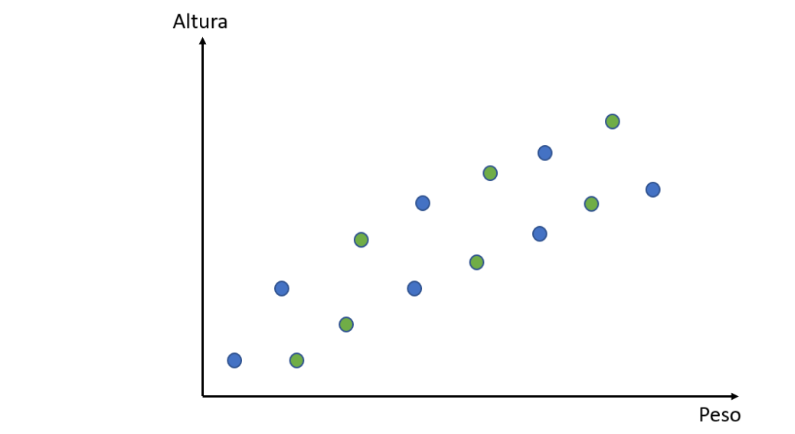

## Viés

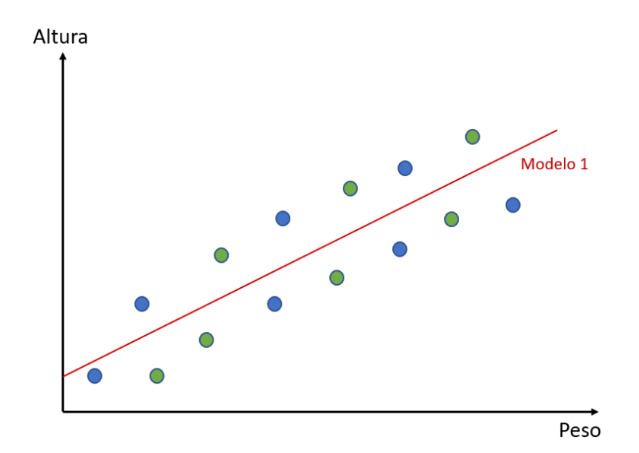


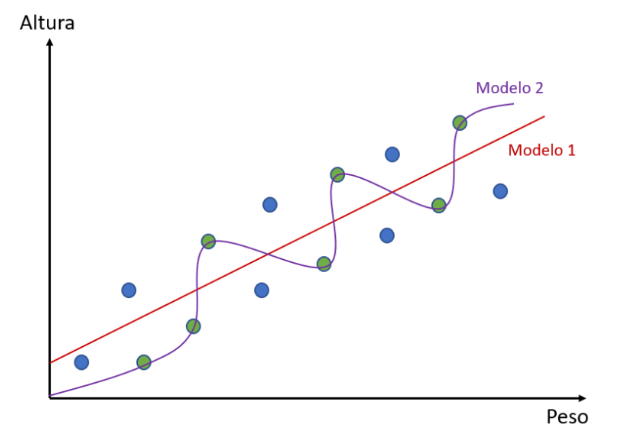

O que seria, então, viés? O conceito de viés, se aplica a flexibilidade de um modelo. Quanto mais alto o viés, menos flexivel é o modelo aos dados de treino. 

Em relação ao nosso exemplo, podemos dizer que o Modelo 2 tem um baixo viés, enquanto o Modelo 1 tem um alto viés. Por quê? Porque o modelo 1 não é um modelo muito flexível: ele não está passando tão próximo dos dados de treino quanto o modelo 2. O Modelo 2 se adequa melhor aos dados de treino do que o Modelo 1 porém os padrões que ele tal modelo 2 encontra no treino não se repetem nos dados de teste.

## Variância

A variância é a sensibilidade de um modelo ao ser usado com outros datasets diferentes do treinamento. Se o modelo é muito sensível aos dados de treinamento, ou seja, identificou tão bem a relação entre os dados de treinamento que quando colocado em teste irá errar justamente a variação que existe entre os datasets.

Em relação ao nosso exemplo, podemos dizer que o Modelo 2 tem uma alta variância, enquanto o Modelo 1 tem uma baixa variância. Por quê? Pelo mesmo motivo acima.

## Conclusão

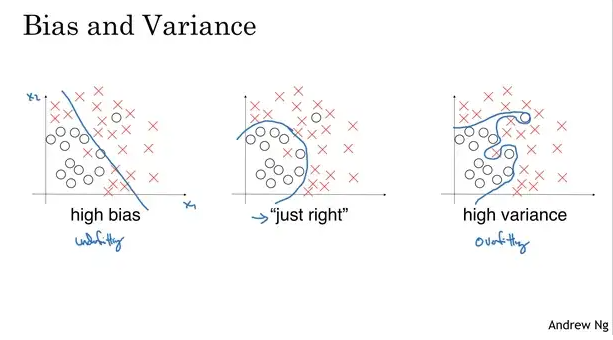

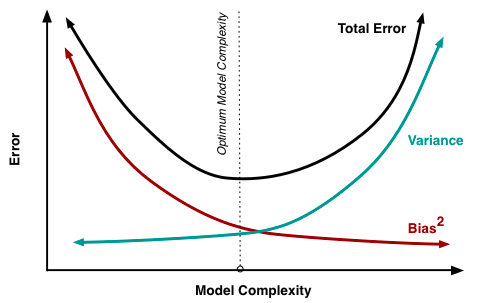

# Criando os Dados

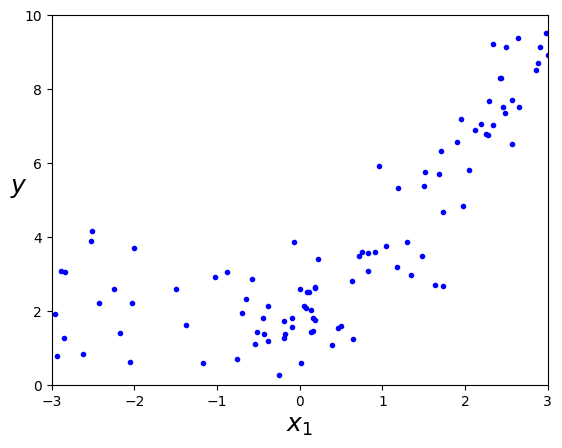

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regressão Polinomial

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02809408]), array([[1.11356911, 0.47255867]]))

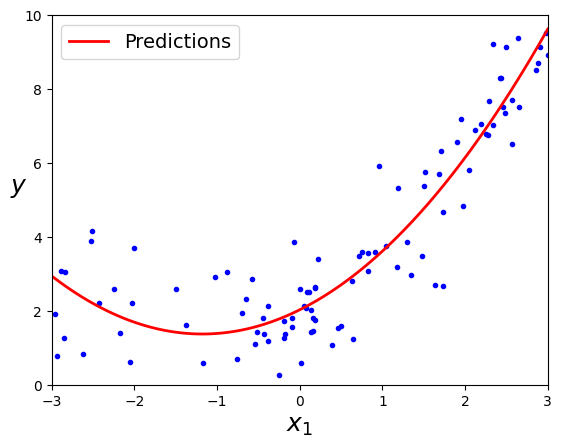

In [5]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

OBS: 

Se atentar ao fato de que o grau d no PolynomialFeatures escala da forma (n+d)! / d!n!, sendo o d o grau e n o número de features. 

Por exemplo: Em um dataset com 5 features utilizando o PolynomialFeatures com grau (degree) = 3 teriamos -> (5+3)! / 5!3! = 54 features. Aumentando o grau de 3 para 5 já seriam 252 features! 

# Curvas de Aprendizado e Trade-off Viés/Variância

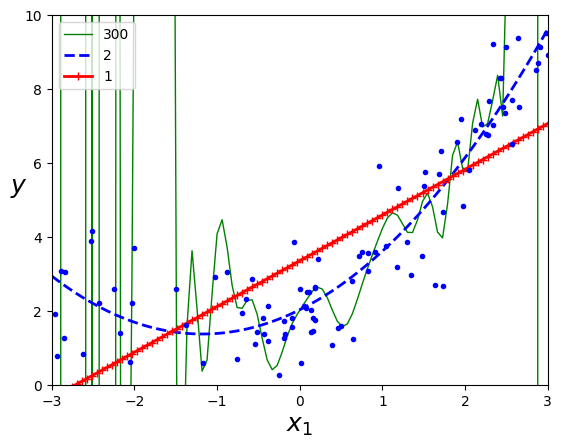

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

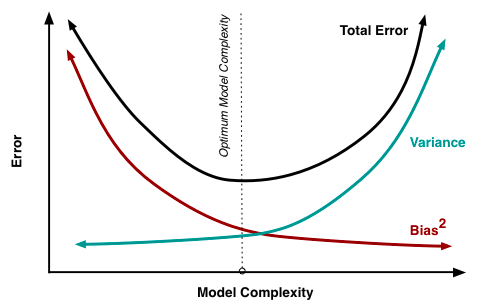

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def plot_overfitting(X, y):

    X_train, y_train = X[:80], y[:80]
    X_test, y_test = X[80:], y[80:]

    # Train a linear regression model on the training data with different polynomial degrees
    train_errors = []
    val_errors = []
    for i in range(1, 30):
        polybig_features = PolynomialFeatures(degree=i, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", polybig_features),
                ("std_scaler", std_scaler),
                ("lin_reg", lin_reg),
            ])
        
        polynomial_regression.fit(X_train, y_train)
        y_train_predict = polynomial_regression.predict(X_train)
        y_test_predict = polynomial_regression.predict(X_test)
        train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

    # Plot the train and test scores
    plt.plot(train_errors, label='Train')
    plt.plot(val_errors, label='Test')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
def plot_overfitting_with_cross_validation(X, y):

    # Train a linear regression model on the training data with different polynomial degrees
    val_rmses = []
    for i in range(1, 30):
        polybig_features = PolynomialFeatures(degree=i, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", polybig_features),
                ("std_scaler", std_scaler),
                ("lin_reg", lin_reg),
            ])
        
        val_rmse = np.mean(np.sqrt(-cross_val_score(polynomial_regression, X, y, cv=5, scoring='neg_mean_squared_error')))
        val_rmses.append(val_rmse)

    # Plot the train and test scores
    plt.plot(val_rmses, label='Validation RMSE')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

def plot_learning_curves(X, y, degree=1):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        
        model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", LinearRegression()),
            ])
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    
    df = pd.DataFrame({
        'Training set size': range(len(train_errors)),
        'train_errors': train_errors,
        'val_errors': val_errors},
    ).set_index('Training set size').round(2)
    
    df.plot()
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])
    plt.show()

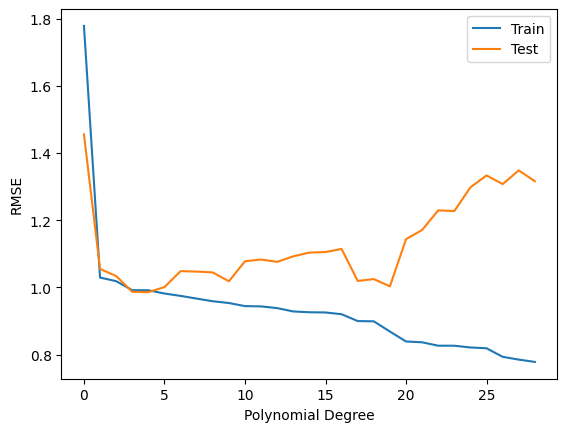

In [8]:
plot_overfitting(X, y)
plt.show()

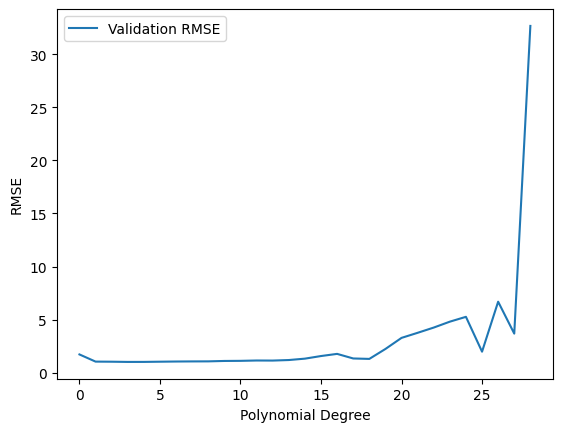

In [9]:
plot_overfitting_with_cross_validation(X, y)
plt.show()

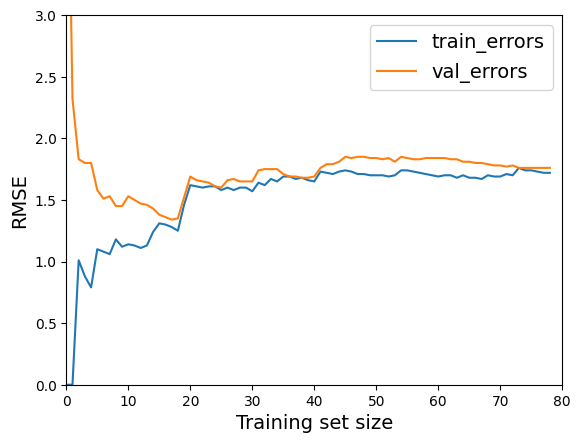

In [10]:
plot_learning_curves(X, y)

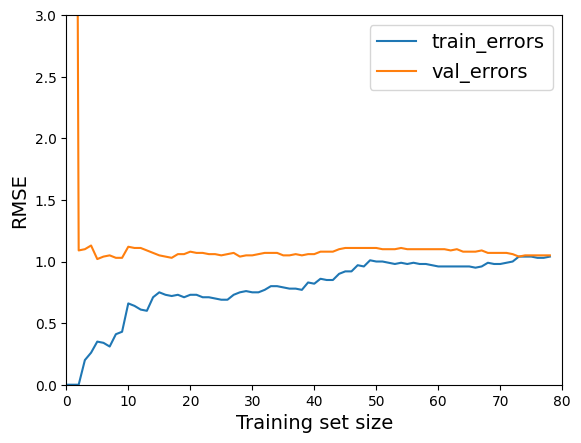

In [11]:
plot_learning_curves(X, y, degree=2)

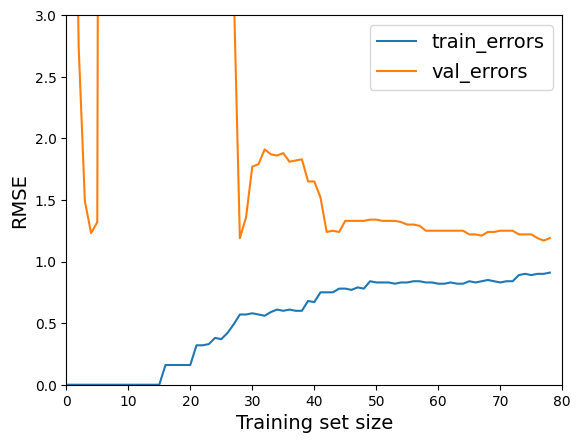

In [12]:
plot_learning_curves(X, y, degree=15)

# Regularização

A regularização é uma técnica usada em aprendizado de máquina para evitar o overfitting (ajuste excessivo) do modelo aos dados de treinamento. O overfitting ocorre quando o modelo aprende muito bem os dados de treinamento, mas não tem boa capacidade de generalização para dados novos.

A regularização é realizada adicionando uma penalidade ao modelo durante o processo de treinamento, a fim de limitar a complexidade do modelo e evitar o overfitting. Existem duas principais formas de regularização: a regularização L1 (Lasso) e a regularização L2 (Ridge).

A escolha entre a regularização L1 e L2 depende do problema e da natureza dos dados. Veremos a seguir um pouco mais sobre essas duas técnicas e sobre como escolher a melhor para cada tipo de problema.

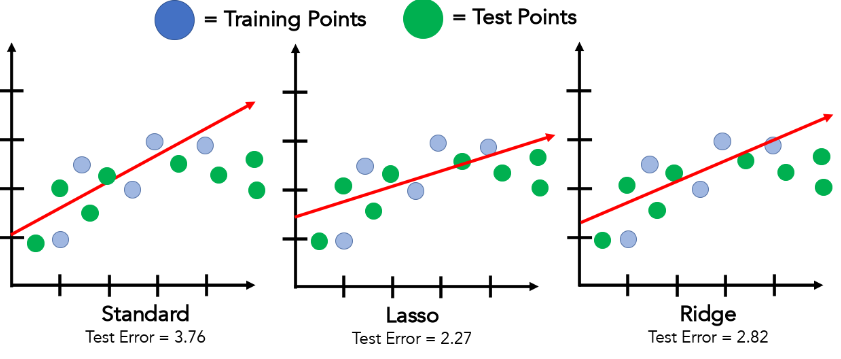

## Gerando os Dados

In [16]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

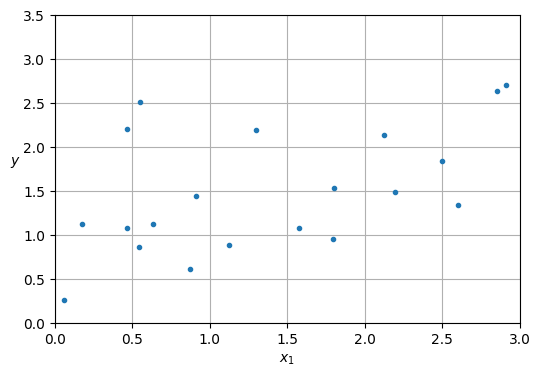

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

## Ridge

Se você já sabe o que é a regressão linear multivariável e polinomial, então a regressão ridge é uma técnica que você pode usar para melhorar ainda mais seus modelos.

A regressão ridge é uma técnica de regularização que ajuda a reduzir a variação nos seus modelos de regressão. Isso pode ser particularmente útil quando se trabalha com um grande número de variáveis independentes que estão altamente correlacionadas, o que pode levar a estimativas imprecisas dos coeficientes da regressão.

O método de regressão ridge funciona adicionando um termo de penalidade à função objetivo que você está tentando minimizar. Este termo de penalidade adiciona uma penalização para valores extremos dos coeficientes da regressão, o que ajuda a restringir os valores dos coeficientes e reduzir a variação do modelo.

O parâmetro de regularização α (também conhecido como parâmetro de ajuste) controla a quantidade de penalização que é aplicada aos coeficientes da regressão. Se você aumentar o valor do parâmetro de regularização, os coeficientes da regressão serão ainda mais restringidos, o que pode ajudar a evitar problemas de overfitting (sobreajuste).

Em resumo, a regressão ridge é uma técnica de regularização que ajuda a reduzir a variação em seus modelos de regressão, tornando-os mais estáveis e precisos. É uma ferramenta valiosa para qualquer pessoa que trabalha com modelos de regressão que envolvem um grande número de variáveis independentes altamente correlacionadas.

Função de Custo para Regressão Ridge:

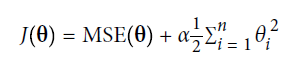

Repare que o termo θ0 não é regularizado (a soma começa no i = 1 invés de i = 0)

OBS: É importante escalar os dados (por exemplo, usando um StandardScaler) antes de executar a Ridge Regression, pois a mesma é sensível à escala das features. Isso é verdade para a maioria dos modelos regularizados.

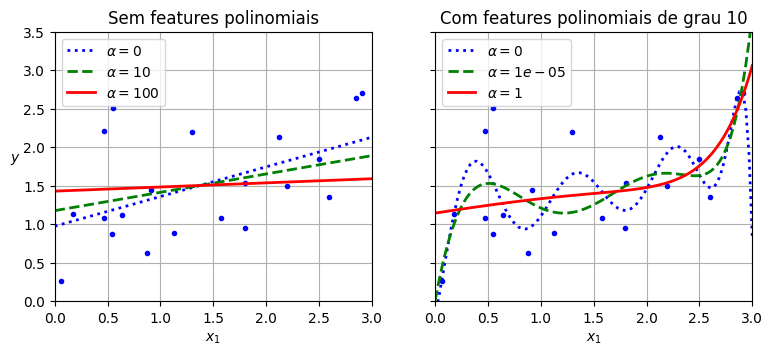

In [28]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    """Plota as predicoes de diferentes alphas para o modelo regularizado."""
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.title('Sem features polinomiais')
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plt.title('Com features polinomiais de grau 10')
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Assim como na regressão linear, podemos fazer a regressão Ridge por meio de uma equação de forma fechada ou pelo gradiente descendente. Os prós e contras são os mesmos.

A solução de forma fechada, em que A é a matriz identidade (n + 1) x (n + 1), exceto o 0 na cédula superior esquerda, correspondente ao viés:

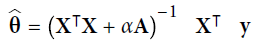

Segue a Regressão Ridge resolvida com uma solução de forma fechada utilizando uma técnica de fatoração de matriz de André-Luis Cholesky:

In [30]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

Utilizando o Gradiente Descendente Estocástico:

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() por conta do .fit() esperar um array de targets de 1D
sgd_reg.predict([[1.5]])

array([1.55302613])

O hiperparâmetro "penalty" define o tipo de termo de regularização a ser usado.

## Lasso 

Assim como a regressão ridge, a regressão Lasso é uma técnica de regularização que ajuda a reduzir a variação nos modelos de regressão. No entanto, existem algumas diferenças importantes entre esses dois métodos.

Enquanto a regressão ridge adiciona um termo de penalidade que é proporcional ao quadrado dos coeficientes da regressão (L2), a regressão Lasso adiciona um termo de penalidade que é proporcional ao valor absoluto dos coeficientes da regressão (L1). Isso significa que a regressão Lasso tende a "encolher" os coeficientes da regressão para zero com mais força do que a regressão ridge.

Essa diferença tem algumas implicações importantes. Por exemplo, a regressão Lasso é frequentemente usada para seleção de variáveis, já que ela tende a definir coeficientes de regressão nulos para variáveis menos importantes. Isso pode levar a modelos mais simples e interpretáveis.

Outra diferença importante é que a regressão Lasso tende a produzir soluções esparsas, o que significa que apenas alguns dos coeficientes de regressão são diferentes de zero. Por outro lado, a regressão ridge tende a produzir soluções com coeficientes menores, mas ainda diferentes de zero para todas as variáveis independentes.

Em geral, a escolha entre a regressão ridge e a regressão Lasso depende das suas necessidades específicas. Se você está procurando um modelo simples e fácil de interpretar, a regressão Lasso pode ser a melhor opção. Por outro lado, se você deseja manter todas as variáveis independentes em seu modelo, mas reduzir a variação, a regressão ridge pode ser a melhor escolha.

Função de Custo para Regressão Lasso:

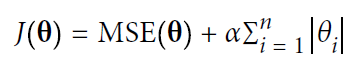

Assim como para a Ridge, para a Regressão Lasso temos a equação de forma fechada e utilizando o gradiente descendente.

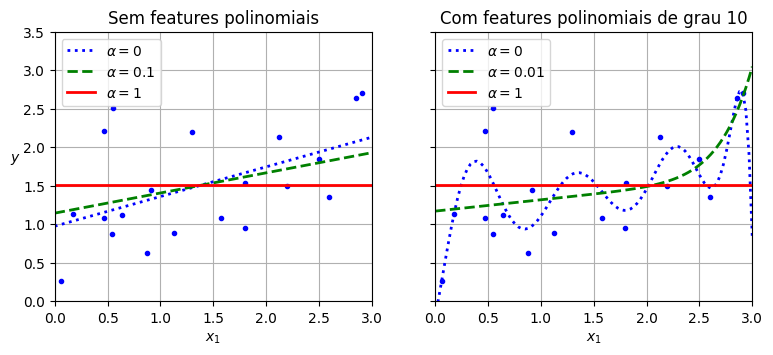

In [38]:
from sklearn.linear_model import Lasso

# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.title('Sem features polinomiais')
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plt.title('Com features polinomiais de grau 10')
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

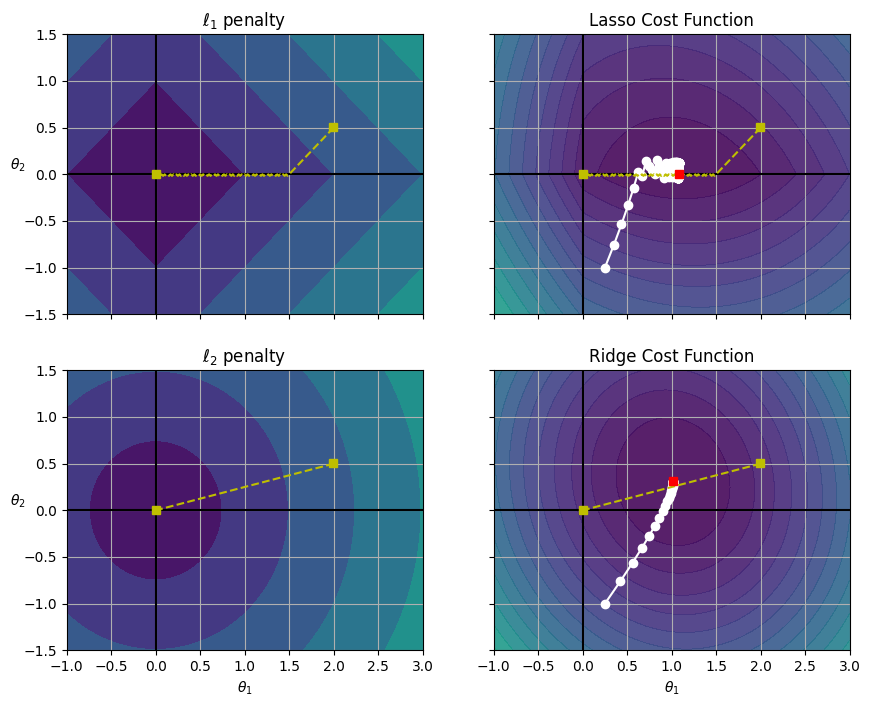

In [41]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso Cost Function"), (1, N2, 0, 2.0, "Ridge Cost Function")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

Interpretação:

No conjunto de plots:

    * Os eixos x e y reseprentam os parametros theta 1 e theta 2, respectivamente.

    * Os contornos de fundo à esquerda representam a penalidade (l1 em cima e l2 em baixo).

    * Os contornos de fundo à direita representam a função de custo (MSE + penalidade).
    
A linha amarela representa os valores dos parametros para diferentes alpha's. O alpha do mínimo (0) até o máximo (1) leva os dois parametros de onde foram inicializados ([2.0, 0.5]) à zero ([0, 0]) de maneiras distintas conforme cada tipo de penalidade.

A linha branca e seus pontos representam o caminho do custo (inicializado em [0.25, -1.0]) em um modelo SGD com a função de custo (MSE + penalidade). Tal modelo é otimizado com a função de custo (MSE + penalidade) indo em direção ao valor ideal global (ponto vermelho). Tal otimização está com alpha = 0.5 (por isso o ponto vermelho no meio de linha amarela). Se aumentássemos alpha, o ponto vermelho se deslocaria para a esquerda da linha amarela e, caso o contrário, iria para a direita.

Assimile o gráfico e reflita sobre tudo que foi passado até o momento. (Tudo bem não entender de primeira, sério)

## Elastic Net

O Elastic Net é uma técnica de regularização que combina os efeitos da regressão ridge e da regressão Lasso. Assim como a regressão ridge e Lasso, o objetivo do Elastic Net é reduzir a variação em modelos de regressão que envolvem várias variáveis independentes altamente correlacionadas.

O Elastic Net adiciona dois termos de penalidade à função objetivo: um termo de penalidade L1 (proporcional ao valor absoluto dos coeficientes da regressão) e um termo de penalidade L2 (proporcional ao quadrado dos coeficientes da regressão). O parâmetro de regularização do Elastic Net controla a influência relativa desses dois termos de penalidade.

Ao combinar as propriedades da regressão ridge e Lasso, o Elastic Net pode ser útil quando se lida com conjuntos de dados com muitas variáveis independentes, algumas das quais são altamente correlacionadas e outras são menos importantes. O Elastic Net pode lidar com essa complexidade, permitindo a seleção de variáveis importantes e ao mesmo tempo reduzindo a variação do modelo.

Em resumo, o Elastic Net é uma técnica de regularização (r) que combina as propriedades da regressão ridge e da regressão Lasso, ajudando a reduzir a variação em modelos de regressão que envolvem muitas variáveis independentes altamente correlacionadas. É uma ferramenta útil para selecionar variáveis importantes e reduzir a complexidade do modelo, enquanto ainda mantém um bom ajuste aos dados.

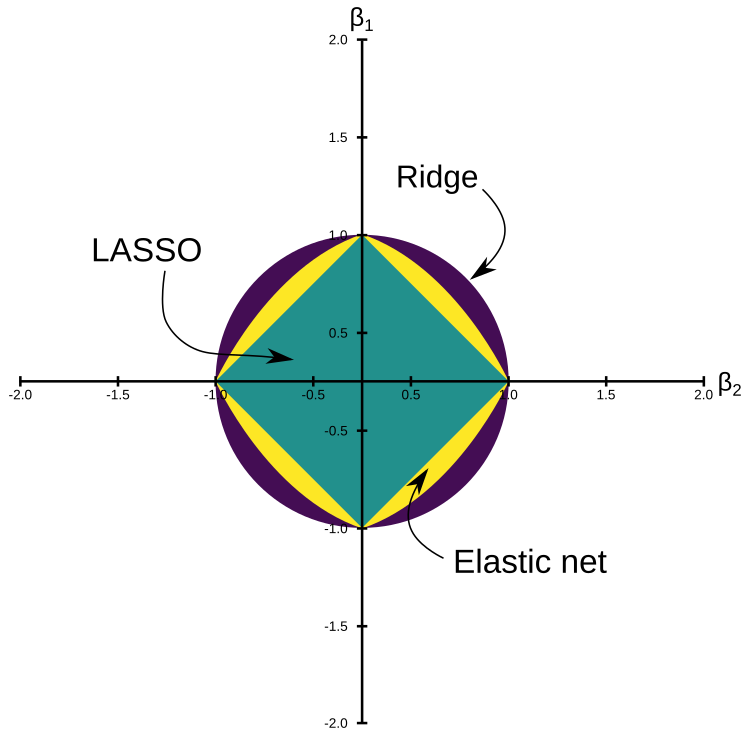


Função de Custo da Elastic Net:

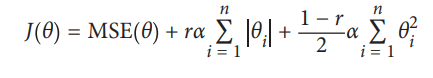

Perceba que o termo de regularização r da Elastic Net varia entre 1 e 0, com 1 resultando em um modelo completamente igual a uma Lasso e 0 a uma Ridge.

Então, quando utilizar uma simples Regressão Linear (por exemplo, sem qualquer regularização), Ridge, Lasso ou Elastic Net? Quase sempre é preferível ter pelo menos um pouco de regularização, então geralmente você deve evitar uma simples Regressão Linear.

Ridge é um bom padrão, mas, se você suspeitar que apenas algumas características são úteis, deve preferir Lasso ou Elastic Net, pois elas tendem a reduzir a zero os pesos das características inúteis, conforme discutido. No geral, a Elastic Net é preferida à Lasso porque esta pode se comportar erraticamente quando o número de características for maior que o número de instâncias de treinamento ou quando várias características estiverem fortemente correlacionadas.

In [42]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Parada Antecipada (Early Stopping)

O Early Stopping é uma técnica de regularização que é usada em algoritmos de aprendizado de máquina, como redes neurais, para evitar que o modelo se ajuste demais aos dados de treinamento e comece a se ajustar muito mal aos dados de teste.

O Early Stopping funciona monitorando o desempenho do modelo em um conjunto de validação durante o treinamento. À medida que o modelo é treinado, o erro nos dados de treinamento geralmente diminui, enquanto o erro nos dados de validação pode começar a aumentar depois de atingir um mínimo. Isso ocorre porque o modelo está se ajustando demais aos dados de treinamento e não generalizando bem para os dados de teste.

Com o Early Stopping, o treinamento do modelo é interrompido assim que o erro nos dados de validação começa a aumentar, em vez de continuar o treinamento até que o erro nos dados de treinamento seja minimizado. Isso ajuda a evitar que o modelo se ajuste demais e comece a generalizar mal.

Em resumo, o Early Stopping ajuda a encontrar o ponto ideal de regularização e, portanto, produzir modelos mais robustos e generalizáveis.

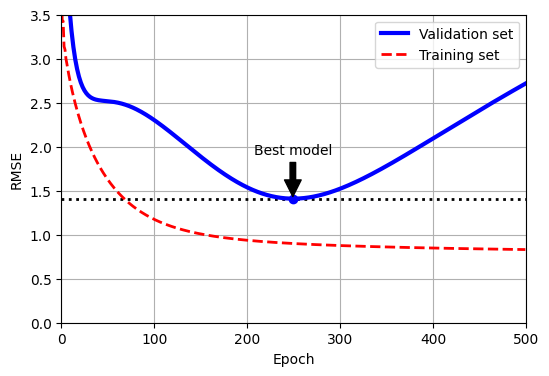

Best Model: SGDRegressor(eta0=0.002, penalty=None, random_state=42)


In [47]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # variaveis para o grafico

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # Avalia erro de treino e salva para o grafico
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)


best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()
print(f"Best Model: {best_model}")

O gráfico acima mostra modelo complexo (neste caso, um modelo de Regressão Polinomial de alto grau) sendo treinado com o uso do Grandiente Descendente em Lote.

Conforme as épocas ocorrem, o algoritmo aprende e seu erro de previsão (RMSE) no conjunto de treinamento naturalmente decai, assim como seu erro de previsão no conjunto de validação. Entretanto, após um tempo, o erro de validação para de decair e começa a subir, indicando que o modelo começou a se sobreajustar aos dados de treinamento. Com a parada antecipada você para o treinamento assim que o erro de validação atingir o mínimo.

É uma técnica de regularização tão simples e eficiente que Geoffrey Hinton a chamou de “lindo almoço grátis”.